## Repaso 

Vamos a simular un dataset de dos clases desbalanceado. La idea es que después de terminar el ejercicio comparen la performance de un módelo, y determinen cuál es, a su criterio, el que mejor funciona para clasificar estos datos. 
**Recuerden que las conclusiones que saquemos de este procedimiento son propias del problema.** ¡Manos a la obra! 


## A. Cargar el dataset
1. Importar pandas y seaborn. 
2. Cargar el iris dataset. 
3. Separar el dataset en datos (X) y etiquetas (y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

#defino dataset desbalanceado
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, class_sep=0.5, weights=[0.90], flip_y=0, random_state=1)

#defino dataset balanceado
X1, y1 = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1)

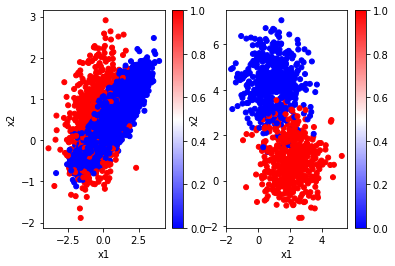

In [4]:
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(122)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Vamos a ver cuantas clases tenemos y en que proporción

In [6]:
print(np.unique(y))
print(np.unique(y1))


[0 1]
[0 1]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


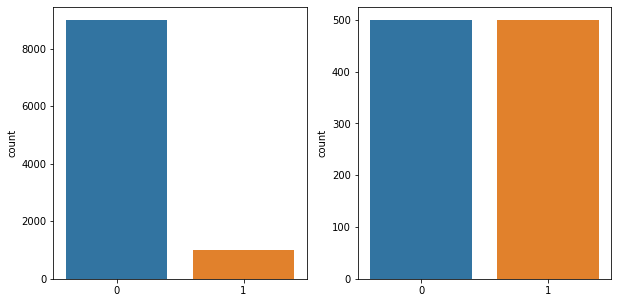

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(y,label="Count")
plt.subplot(122)
sns.countplot(y1,label="Count")
plt.show()

4. Separar el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test,y_test) usando la función **train_test_split** de scikit-learn [recordar importarla primero!]

In [9]:
from sklearn.model_selection import train_test_split

X_dev, X_held, y_dev, y_held = train_test_split(pd.DataFrame(X), y, test_size=0.3, random_state=0)


X1_dev, X1_held, y1_dev, y1_held = train_test_split(pd.DataFrame(X1), y1, test_size=0.3, random_state=0)

In [11]:
#chequeo que no haya missing values
print(X_dev.isnull().sum())
print(X1_dev.isnull().sum())

0    0
1    0
dtype: int64
0    0
1    0
dtype: int64


## B. Preprocessing. 
Como vimos las veces que utilizamos el modelo KNN, es conveniente que los features estén normalizados(¿Por qué?). Nuestro dataset ya se encuentra normalizado. Sin embargo conviene recordar los pasos a seguir si trabajamos con otro dataset.  

0. Chequeá cuál es el mean y el std de X_train y X_test. 
1. Importá el StandardScaler. 
2. Cargar el StandardScaler.
3. Fittearlo con los datos de entrenamiento X_train (¿Por qué no con y_train?¿Por qué no con X_test? Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
4. Transformá las variables X_train e X_test con el StandatdScaler que entrenaste (¿Por qué no y_train e y_test?Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
5. Chequeá cuál es el mean y el std de las X_train y X_test transformadas. 


In [12]:
#siempre es bueno escalar los datos luego de dividirlos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_dev);

scaler1 = StandardScaler()
scaler1.fit(X1_dev);


In [13]:
X_dev_scal = scaler.transform(X_dev)  
X_held_scal = scaler.transform(X_held)  

X1_dev_scal = scaler.transform(X1_dev)  
X1_held_scal = scaler.transform(X1_held)  

In [14]:
print(X_dev.isnull().sum())

print(X1_dev.isnull().sum())

0    0
1    0
dtype: int64
0    0
1    0
dtype: int64


#### *NOTA*: Recordar qué como nuestras variables ya estaban normalizadas utilizaremos directamente X_dev y X_dev_scal

## C. KNN 
1. Importá el moelo de KNN de sklearn usando la siguiente linea: *from sklearn.neighbors import KNeighborsClassifier* 
2. Cuando cargamos el algoritmo, tenemos que indicarle los hiperparámetros que queremos utilizar. La distancia, por default, es la euclideana. Cargá el modelo utilizando 5 vecinos. 


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors =n_neighbors )

clf1 = KNeighborsClassifier(n_neighbors =n_neighbors )

3. Fiteá el modelo utilizando los datos de entrenamiento escaleados. 
4. Calculá el Accuracy DE ENTRENAMIENTO [importar funciones necesarias]
5. Calculá el Accuracy DE TEST.
6. ¿Conclusiones?

In [23]:
#clf.fit(X_dev,y_dev)

clf.fit(X_dev_scal,y_dev)
clf1.fit(X1_dev_scal,y1_dev)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
from sklearn.metrics import accuracy_score

y_dev_pred = clf.predict(X_dev_scal)
train_acc = accuracy_score(y_dev, y_dev_pred)
print(round(train_acc,2))

y1_dev_pred = clf1.predict(X1_dev_scal)
train1_acc = accuracy_score(y1_dev, y1_dev_pred)
print(round(train1_acc,2))

0.94
0.96


In [25]:
y_held_pred = clf.predict(X_held)
test_acc = accuracy_score(y_held, y_held_pred)                                                       
print(round(test_acc,2))

y_held_pred = clf.predict(X_held_scal)
test_acc = accuracy_score(y_held, y_held_pred)                                                       
print(round(test_acc,2))

0.92
0.94


7- En lugar de cálcular el score directamente vamos a hacer cross-validación

In [52]:
#con datos sin escalar 1ro
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_dev,y_dev)
y_dev_pred = clf.predict(X_dev)
scores = cross_val_score(clf,X_dev, y_dev,cv= 10, scoring='accuracy')



clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(X1_dev,y1_dev)
y1_dev_pred = clf.predict(X1_dev)
scores1 = cross_val_score(clf1,X1_dev, y1_dev,cv= 10, scoring='accuracy')

In [53]:
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (scores1.mean(),scores1.std()*2))

Accuracy para KNN: 0.92 (+/- 0.01)
Accuracy para KNN: 0.96 (+/- 0.03)


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_dev, y_dev_pred))

print(classification_report(y1_dev, y1_dev_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6273
           1       0.85      0.45      0.59       727

    accuracy                           0.94      7000
   macro avg       0.90      0.72      0.78      7000
weighted avg       0.93      0.94      0.93      7000

              precision    recall  f1-score   support

           0       0.11      0.11      0.11       345
           1       0.11      0.11      0.11       355

    accuracy                           0.11       700
   macro avg       0.11      0.11      0.11       700
weighted avg       0.11      0.11      0.11       700



In [55]:
y_held_pred = clf.predict(X_held)
print(classification_report(y_held, y_held_pred))

y1_held_pred = clf1.predict(X1_held)
print(classification_report(y1_held, y1_held_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2728
           1       0.83      0.41      0.55       272

    accuracy                           0.94      3000
   macro avg       0.89      0.70      0.76      3000
weighted avg       0.93      0.94      0.93      3000

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       155
           1       0.93      0.94      0.93       145

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



8.Para poder determinar el hiperparámetro K, es útil trazar la curva de complejidad. Corré las lineas a continuación e interpretá la curva. 

In [56]:
from sklearn.model_selection import validation_curve
param_range= np.linspace(1, 10,dtype=int)

train_scores, test_scores = validation_curve(
    clf, X_dev, y_dev, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", cv=5,n_jobs=1)


#otra forma, con los datos 1
from sklearn.model_selection import cross_validate

knn1_train_scores_mean = []
knn1_train_scores_std = []
knn1_test_scores_mean = []
knn1_test_scores_std = []

vecinos1 = np.linspace(1, 10,dtype=int)

for vecino in vecinos1:
    knn1 = KNeighborsClassifier(n_neighbors=vecino)
    knn1_scores = cross_validate(knn1, X1_dev_scal, y1_dev, cv=5, return_train_score=True, n_jobs = -1)
    
    knn1_train_scores_mean.append(knn1_scores['train_score'].mean())
    knn1_train_scores_std.append(knn1_scores['train_score'].std())
    
    knn1_test_scores_mean.append(knn1_scores['test_score'].mean())
    knn1_test_scores_std.append(knn1_scores['test_score'].std())


In [57]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


#datos1
knn1_train_scores_mean = np.array(knn1_train_scores_mean)
knn1_train_scores_std = np.array(knn1_train_scores_std)
knn1_test_scores_mean = np.array(knn1_test_scores_mean)
knn1_test_scores_std = np.array(knn1_test_scores_std)

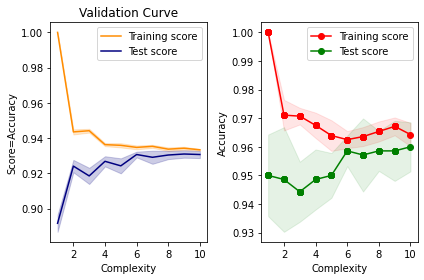

In [58]:
# Plot learning curve
plt.figure()
plt.subplot(121)
plt.title("Validation Curve")
plt.xlabel("Complexity")
plt.ylabel("Score=Accuracy")
#plt.ylim(0.0, 1.1)
#plt.xlim(0, 100)
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(param_range, test_scores_mean, label="Test score",
             color="navy")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")


plt.subplot(122)
plt.fill_between(vecinos1, knn1_train_scores_mean - knn1_train_scores_std,
                 knn1_train_scores_mean + knn1_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(vecinos1, knn1_test_scores_mean - knn1_test_scores_std,
                 knn1_test_scores_mean + knn1_test_scores_std, alpha=0.1, color="g")
plt.plot(vecinos1, knn1_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(vecinos1, knn1_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Complexity')
plt.tight_layout()

Otra forma de hacer lo mismo para datos 1


In [59]:
from sklearn.model_selection import validation_curve
param_range= np.linspace(1, 10,dtype=int)

clf1 = KNeighborsClassifier()

train1_scores, test1_scores = validation_curve(
    clf1, X1_dev_scal, y1_dev, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", cv=5,n_jobs=1)

In [60]:
train1_scores_mean = np.mean(train1_scores, axis=1)
train1_scores_std = np.std(train1_scores, axis=1)
test1_scores_mean = np.mean(test1_scores, axis=1)
test1_scores_std = np.std(test1_scores, axis=1)

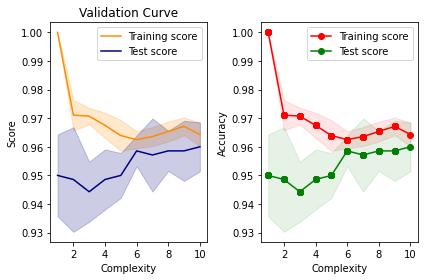

In [61]:
# Plot learning curve
plt.figure()
plt.subplot(121)
plt.title("Validation Curve")
plt.xlabel("Complexity")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
#plt.xlim(0, 100)
plt.plot(param_range, train1_scores_mean, label="Training score",
             color="darkorange")
plt.fill_between(param_range, train1_scores_mean - train1_scores_std,
                 train1_scores_mean + train1_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(param_range, test1_scores_mean, label="Test score",
             color="navy")
plt.fill_between(param_range, test1_scores_mean - test1_scores_std,
                 test1_scores_mean + test1_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")

plt.subplot(122)
plt.fill_between(vecinos1, knn1_train_scores_mean - knn1_train_scores_std,
                 knn1_train_scores_mean + knn1_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(vecinos1, knn1_test_scores_mean - knn1_test_scores_std,
                 knn1_test_scores_mean + knn1_test_scores_std, alpha=0.1, color="g")
plt.plot(vecinos1, knn1_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(vecinos1, knn1_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Complexity')
plt.tight_layout()

#es el mismo resultado

## Ahora vamos a calcular la curva ROC

In [62]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [64]:
y_score = clf.predict_proba(X_dev)
clf1.fit(X1_dev,y1_dev)
y1_score = clf1.predict_proba(X1_dev)

In [67]:
print(y_score)
print('------------------------')
print(y1_score[:-5])

[[1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 ...
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]
------------------------
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [68]:
np.unique(y_dev)

np.unique(y1_dev)


array([0, 1])

In [71]:
from sklearn.metrics import roc_curve
#la curva de roc depende de ese score de "probabilidad" o mejor dicho de estimación de cuan buena es la separación de los datos para clasificar
fpr, tpr, thresholds = roc_curve(y_dev, y_score[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y1_dev, y1_score[:,1])

In [72]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend()

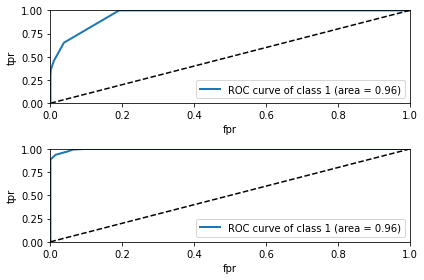

In [74]:
plt.subplot(211)
roc_auc= auc(fpr, tpr)   
plot_roc_curve(fpr, tpr,label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(1, roc_auc))
plt.subplot(212)
roc_auc1= auc(fpr1, tpr1)   
plot_roc_curve(fpr1, tpr1,label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(1, roc_auc))

plt.tight_layout()
plt.show()

#como se puede ver aún con datos desbalanceados la curva roc "pinta re bien"
#pero no es una medida unica para determinar algo, en ese caso uno tiene que comparar todos los scores
#y dependiendo de que tipo de modelo quiera tendría uno más preciso o más exhaustivo.